In [1]:
import sys
import os
import matplotlib.pyplot as plt

In [2]:
main_file = "./src/main.cpp"
command_base = "g++ -o main -MMD -MP -ffast-math -march=native {} {} ./src/main.cpp && ./main {}"

In [3]:
def get_timers(raw, query):
    lines = [line[6:].strip().split(",") for line in raw.split("\n") if line.startswith("TIMER:")]
    lines = {line[0]: float(line[2]) for line in lines}
    return lines.get(query, -1)
    
def work(nlist, flag, macro, function_label):
    command_base = "g++ -o main -MMD -MP -ffast-math -march=native {} {} ./src/main.cpp && ./main {}"
    res = list()
    for n in nlist:
        command = command_base.format(flag, macro, n)
        raw = os.popen(command).read()
        timer = get_timers(raw, function_label)
        res.append(timer)
    return res
        


# Plot ABS Value

In [4]:
# input is 
def plot_abs(nlist, data):
    fig, ax = plt.subplots(figsize=(10,8))
    # fig.delaxes(axs[1,1])
    for name, ys in data.items():
        alpha=1  # 不透明度
        Linewidths=[2, 2, 2]

        xs = [str(n) for n in nlist]

        ax.set_title(r"Cycles", loc="left", fontsize=20,pad=16)

        # grid
        ax.set_facecolor("lavender")
        for b in ax.get_ygridlines():
            b.set_color('white')
            b.set_linewidth(2)
        ax.tick_params(axis='both', top=False, bottom=True, left=False, right=False, direction='out', which='both', labelsize=14,pad=8)

        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.grid(True, axis="y")
        ax.set_xlabel(r'n')
        ax.spines['bottom'].set_linewidth(2)
        ax.xaxis.set_tick_params(width=2)

        ax.plot(xs, ys, linewidth=Linewidths[0], label=name)

        ax.legend(fontsize="large")

    fig.tight_layout()

# Plot Speedup

In [7]:
def plot_speedup(nlist, data, baseline_key):
    fig, ax = plt.subplots(figsize=(10,8))
    # fig.delaxes(axs[1,1])
    for name, ys in data.items():
        alpha=1  # 不透明度
        Linewidths=[2, 2, 2]
        
        ys = [data[baseline_key][i] / ys[i] for i in range(len(nlist))]
        xs = [str(n) for n in nlist]

        ax.set_title(r"Speedup", loc="left", fontsize=20,pad=16)

        # grid
        ax.set_facecolor("lavender")
        for b in ax.get_ygridlines():
            b.set_color('white')
            b.set_linewidth(2)
        ax.tick_params(axis='both', top=False, bottom=True, left=False, right=False, direction='out', which='both', labelsize=14,pad=8)

        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.grid(True, axis="y")
        ax.set_xlabel(r'n')
        ax.spines['bottom'].set_linewidth(2)
        ax.xaxis.set_tick_params(width=2)

        ax.plot(xs, ys, linewidth=Linewidths[0], label=name)

        ax.legend(fontsize="large")

    fig.tight_layout()

nvec-avx2 is running...
nvec-scalar is running...
nvec-base is running...
vec-avx2 is running...
vec-scalar is running...
vec-base is running...


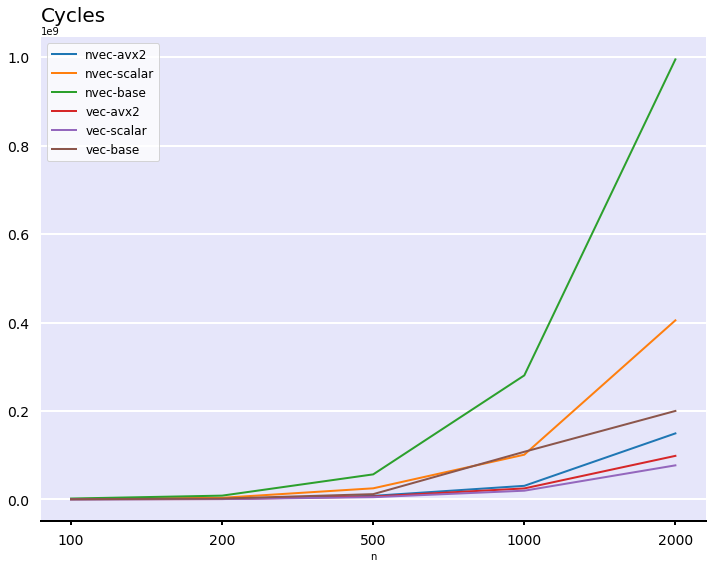

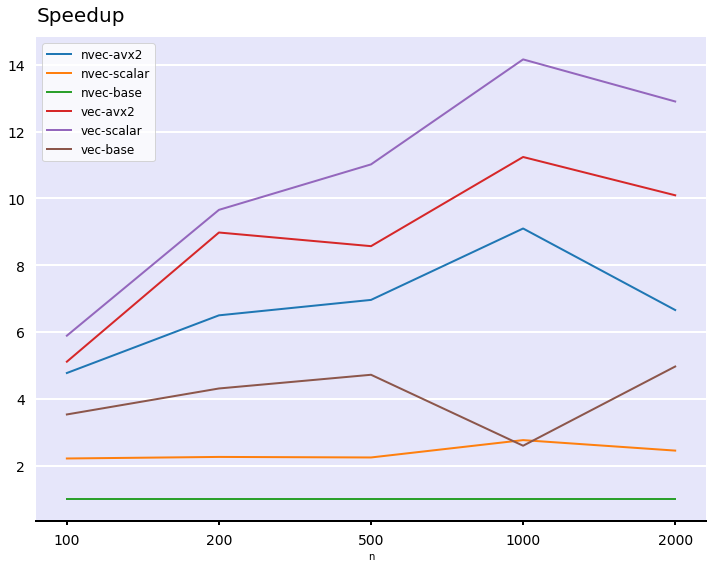

In [8]:
def main():
    flags = {
    'nvec': '-O3 -fno-tree-vectorize',
    'vec': '-O3'
    }
    macros = {
        'avx2': '-DV_SCALAR -DSYM_AFF_PA_AVX2',
        'scalar': '-DV_SCALAR -DSYM_AFF_PA_SCALAR_UP1',
        'base': '-DV_BASELINE'
    }
    nlist = [100, 200, 500, 1000, 2000]
    
    data = {}
    for kf, vf in flags.items():
        for km, vm in macros.items():
            key = kf + '-' + km
            print(key, "is running...")
            data[key] = work(nlist, vf, vm, "PA")
            
    plot_abs(nlist, data)
    plot_speedup(nlist, data, 'nvec-base')

main()